# 삼성 주식 LSTM

### 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### 단층 LSTM

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flyai_deep/datasets/005930.KS.csv')

In [3]:
df.shape

(5675, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5675 entries, 0 to 5674
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5675 non-null   object 
 1   Open       5675 non-null   float64
 2   High       5675 non-null   float64
 3   Low        5675 non-null   float64
 4   Close      5675 non-null   float64
 5   Adj Close  5675 non-null   float64
 6   Volume     5675 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 310.5+ KB


#### 이동평균 컬럼 추가


In [3]:
df['ma3'] = df['Adj Close'].rolling(window=3).mean()   # rolling : 이동평균, 3일 평균
df['ma5'] = df['Adj Close'].rolling(window=5).mean()


#### 중간값 컬럼 추가

In [4]:
df['mid']=(df['High']+df['Low'])/2

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ma3,ma5,mid
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4623.466797,74195000,NaN,NaN,5885.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4222.414551,74680000,NaN,NaN,5790.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4252.681152,54390000,4366.187500,NaN,5680.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4192.147461,40305000,4222.414388,NaN,5515.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4366.187988,46880000,4270.338867,4331.37959,5675.0


#### 시각화

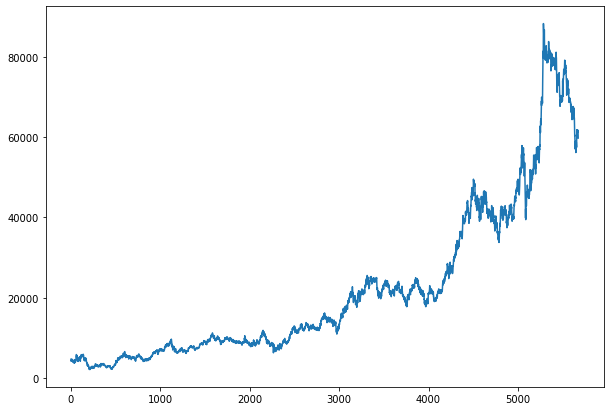

In [5]:
plt.figure(figsize=(10,7))
plt.plot(df['Adj Close'])

#### 결측치 확인 / 채우기

In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
ma3          2
ma5          4
mid          0
dtype: int64

In [10]:
for col in df.columns:
  missing = df.loc[df[col]==0].shape[0]
  print(col + " :" + str(missing))

Date :0
Open :0
High :0
Low :0
Close :0
Adj Close :0
Volume :127
ma3 :0
ma5 :0
mid :0


In [13]:
df.loc[df['Volume']==0]

,Date,Open,High,Low,Close,Adj Close,Volume,ma3,ma5,mid
23,2000-02-04,5130.0,5130.0,5130.0,5130.0,3881.896240,0,3912.164388,3996.915430,5130.0
41,2000-03-01,5120.0,5120.0,5120.0,5120.0,3874.329102,0,3793.614014,3818.332959,5120.0
66,2000-04-05,6800.0,6800.0,6800.0,6800.0,5145.594727,0,5221.264649,5213.697656,6800.0
72,2000-04-13,6910.0,6910.0,6910.0,6910.0,5228.831055,0,5276.755534,5360.497852,6910.0
84,2000-05-01,6000.0,6000.0,6000.0,6000.0,4540.229980,0,4388.888916,4334.406006,6000.0
...,...,...,...,...,...,...,...,...,...,...
5564,2022-02-28,71900.0,71900.0,71900.0,71900.0,71095.539063,0,70963.695313,71965.689063,71900.0
5567,2022-03-04,72900.0,72900.0,72900.0,72900.0,72084.343750,0,71688.817708,71451.506250,72900.0
5570,2022-03-10,69500.0,69500.0,69500.0,69500.0,68722.390625,0,68920.151042,70185.828125,69500.0
5573,2022-03-15,70200.0,70200.0,70200.0,70200.0,69414.554688,0,69348.635417,69098.137500,70200.0


In [25]:
df.Volume = df.Volume.replace(0,np.NaN)

In [28]:
df.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
ma3            2
ma5            4
mid            0
dtype: int64

In [29]:
df = df.dropna()

#### 스케일링

In [34]:
sel_col = df.select_dtypes(include = ['float64']).columns  # 근데 y데이터는 빼고 스케일링 해야됨

In [35]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
scaled_df = sc.fit_transform(df.select_dtypes(include = ['float64']))

In [38]:
scaled_df = pd.DataFrame(scaled_df, columns=sel_col)

In [39]:
scaled_df.head()

,Open,High,Low,Close,Adj Close,Volume,ma3,ma5,mid
0,0.034868,0.032008,0.036288,0.034440,0.026655,0.285359,0.025192,0.025698,0.034066
1,0.037375,0.035517,0.038470,0.034440,0.026655,0.363715,0.025634,0.025094,0.036937
2,0.034982,0.031689,0.036518,0.033873,0.026217,0.177799,0.026163,0.025343,0.034011
3,0.034868,0.031689,0.036059,0.033760,0.026129,0.250704,0.025987,0.025503,0.033790
4,0.036235,0.033177,0.037437,0.035120,0.027181,0.300555,0.026163,0.026018,0.035225


#### 데이터 만들기

In [40]:
feature_col = ['Adj Close','ma3','ma5', 'mid']
label_col = ['Close']

In [42]:
X = scaled_df[feature_col]
y = scaled_df[label_col]

In [44]:
X = X.to_numpy()
y = y.to_numpy()

In [45]:
# RNN 쓰려고 타임스탭이 있는 데이터 형태로 변환

def make_sequence_dataset(feature, label, window_size):
  feature_list = []
  label_list = []

  for i in range(len(feature)- window_size):
    feature_list.append(feature[i:i+window_size])
    label_list.append(label[i+window_size])

  return np.array(feature_list), np.array(label_list)


In [46]:
window_size =40  # 앞 40개 데이터를 보고 다음 날 하나 예측
X_data, y_data = make_sequence_dataset(X, y, window_size)

In [47]:
X_data.shape  # (샘플수, 타임스탭, x값의 개수)

(5504, 40, 4)

In [48]:
y_data.shape

(5504, 40, 1)

#### 학습/검증셋 분리

In [50]:
split = int(len(X_data) * 0.8)

In [57]:
X_train = X_data[:split]
X_test = X_data[split:]
y_train = y_data[:split]
y_test = y_data[split:]

#### 모델 만들기

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.LSTM(128, activation='tanh', input_shape = (40,4)))
model.add(layers.Dense(1, activation='linear'))  # linear : 들어온 값 그대로 출력

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               68096     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 68,225
Trainable params: 68,225
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])   # ['acc'] : 분류, ['mae'] : 회귀

In [67]:
EPOCH = 100
BATCH_SIZE = 16

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs = EPOCH, batch_size = BATCH_SIZE) 

Epoch 1/100
276/276 [==============================] - 23s 67ms/step - loss: 3.5671e-04 - mae: 0.0115 - val_loss: 0.0016 - val_mae: 0.0305
Epoch 2/100
276/276 [==============================] - 16s 58ms/step - loss: 1.9797e-04 - mae: 0.0098 - val_loss: 0.0020 - val_mae: 0.0348
Epoch 3/100
276/276 [==============================] - 17s 61ms/step - loss: 1.6959e-04 - mae: 0.0091 - val_loss: 0.0021 - val_mae: 0.0344
Epoch 4/100
276/276 [==============================] - 17s 60ms/step - loss: 1.7757e-04 - mae: 0.0094 - val_loss: 0.0029 - val_mae: 0.0469
Epoch 5/100
276/276 [==============================] - 15s 54ms/step - loss: 1.5342e-04 - mae: 0.0087 - val_loss: 0.0024 - val_mae: 0.0363
Epoch 6/100
276/276 [==============================] - 10s 37ms/step - loss: 1.3220e-04 - mae: 0.0080 - val_loss: 0.0049 - val_mae: 0.0486
Epoch 7/100
276/276 [==============================] - 10s 36ms/step - loss: 1.1842e-04 - mae: 0.0077 - val_loss: 0.0069 - val_mae: 0.0556
Epoch 8/100
276/276 [======

In [68]:
# 결과 시각화 함수

def plot_history(history):
  hist = history.history
  plt.figure(figsize=(8,5))
  plt.subplot(1,2,1)
  plt.plot(history.epoch, hist['loss'], label="loss")
  plt.plot(history.epoch, hist['val_loss'], label='val_loss')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(history.epoch, hist['mae'], label="mae")
  plt.plot(history.epoch, hist['val_mae'], label='val_mae')
  plt.legend()
  plt.show()

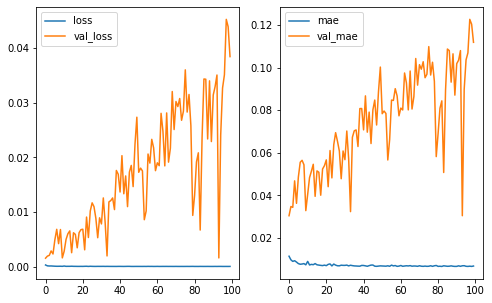

In [69]:
plot_history(history)

In [70]:
y_pred = model.predict(X_test)

In [72]:
y_test.shape

(1101, 40, 1)

In [ ]:
y_test[]

In [74]:
y_test[0]

array([[0.59555908],
       [0.5973717 ],
       [0.56542427],
       [0.57267475],
       [0.56497111],
       [0.54457913],
       [0.54503229],
       [0.55069673],
       [0.54979042],
       [0.53574261],
       [0.5438994 ],
       [0.55817378],
       [0.55568143],
       [0.55930667],
       [0.55047015],
       [0.54752464],
       [0.54253993],
       [0.54911068],
       [0.55318908],
       [0.5257732 ],
       [0.53211737],
       [0.51512405],
       [0.52826555],
       [0.54639175],
       [0.54707149],
       [0.55386881],
       [0.54775122],
       [0.55953325],
       [0.55840036],
       [0.54004758],
       [0.52237453],
       [0.51557721],
       [0.51512405],
       [0.51897587],
       [0.53551603],
       [0.53121106],
       [0.53438314],
       [0.52781239],
       [0.51557721],
       [0.52599977]])

In [71]:
y_pred.shape

(1101, 1)

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()

### Multi LSTM

In [ ]:
def build_model():
  model = keras.Sequential()
  model.add(layers.LSTM(128, activation='tanh', return_sequence=True, input_shape  =(40,4)))
  model.add(layers.LSTM(128, activation='tanh'))
  model.add(layers.Dense(1))
  return model